In [1]:
import sys
# Add the parent directory to the system path
sys.path.insert(1, r"C:\Users\sk88\Documents\Python")

import Function_files.data_functions as dat
from Function_files.plotting_functions import plot_TPA
from TPA import plot_config as config_file

import matplotlib.pyplot as mp  
import os

In [ ]:
# import config file dictionary
config = config_file.config_params
dir = os.path.join(config['root'], config['file'])
# interogate directory to extract folder and file names
folder_list, file_list = dat.dir_interogate(path=dir, extensions=config['extensions'], exceptions=config['exceptions'])
# create dictionary for indexing folders and files
fol_i = dat.make_index_dict(folder_list)
fil_i = [dat.make_index_dict(file_sub_list) for file_sub_list in file_list]
# make paths and extract data
file_list = [file_list]
data_path_list = dat.search_paths(folder_list, file_list, config['extensions'])
json_sets = [dat.read_json(os.path.join(dir, x)) for data_list in data_path_list for x in data_list]
# find the keys
json_keys = [key for key in json_sets[0]]
json_subkeys = [key for key in json_sets[0]['area']]
# 
data_values = [[json_set[key] for json_set in json_sets] for key in json_keys]

In [6]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP\1901_unlocked_HP_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP_p2GHz\1901_unlocked_HP_p2GHz_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP_p4GHz\1901_unlocked_HP_p4GHz_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP\1901_unlocked_LP_avg.json")
json_4 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p2GHz\1901_unlocked_LP_p2GHz_avg.json")
json_5 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p4GHz\1901_unlocked_LP_p4GHz_avg.json")

In [7]:
# import config file dictionary
config = config_file.config_params
json_sets = [json, json_1, json_2, json_3, json_4, json_5]
# find the keys
json_keys = [key for key in json_sets[0]]
json_subkeys = [key for key in json_sets[0]['area']]
# 
data_values = [[json_set[key] for json_set in json_sets] for key in json_keys]

Text(0.02, 0.5, 'Transmission of 995nm Pulses')

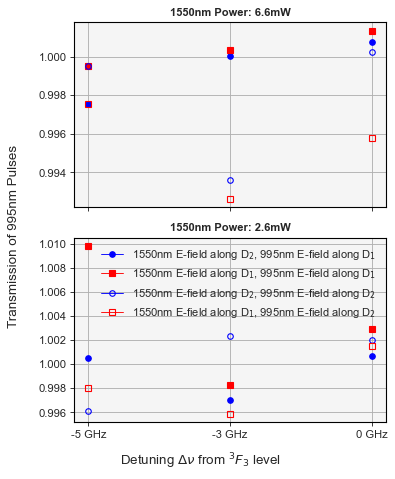

In [8]:
import matplotlib.pyplot as mp

labels = ['-5 GHz', '-3 GHz', '0 GHz']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], data_values[1][0]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], data_values[1][0]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], data_values[1][1]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], data_values[1][1]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], data_values[1][2]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], data_values[1][2]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], data_values[1][3]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], data_values[1][3]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], data_values[1][4]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], data_values[1][4]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], data_values[1][5]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], data_values[1][5]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].legend([f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", 
              f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$"])

ax[0].set(title=('1550nm Power: 6.6mW'))
ax[1].set(title=('1550nm Power: 2.6mW'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses')

In [9]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP\1901_unlocked_HP_no_zero_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP_p2GHz\1901_unlocked_HP_p2GHz_no_zero_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_HP_p4GHz\1901_unlocked_HP_p4GHz_no_zero_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP\1901_unlocked_LP_no_zero_avg.json")
json_4 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p2GHz\1901_unlocked_LP_p2GHz_no_zero_avg.json")
json_5 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p4GHz\1901_unlocked_LP_p4GHz_no_zero_avg.json")

In [10]:
# import config file dictionary
config = config_file.config_params
json_sets = [json, json_1, json_2, json_3, json_4, json_5]
# find the keys
json_keys = [key for key in json_sets[0]]
json_subkeys = [key for key in json_sets[0]['area']]
# 
data_values = [[json_set[key] for json_set in json_sets] for key in json_keys]

Text(0.02, 0.5, 'Transmission of 995nm Pulses (No Zero)')

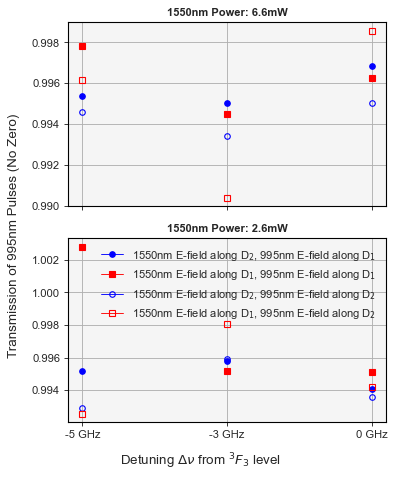

In [12]:
import matplotlib.pyplot as mp

labels = ['-5 GHz', '-3 GHz', '0 GHz']
fig, ax = mp.subplots(nrows=2, sharex=True, figsize=(5,6))

ax[0].plot(labels[0], data_values[1][0]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[0], data_values[1][0]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[0], data_values[1][0]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[1], data_values[1][1]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[1], data_values[1][1]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[1], data_values[1][1]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[0].plot(labels[2], data_values[1][2]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[0].plot(labels[2], data_values[1][2]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[0].plot(labels[2], data_values[1][2]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[0], data_values[1][3]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[0], data_values[1][3]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[0], data_values[1][3]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[1], data_values[1][4]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[1], data_values[1][4]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[1], data_values[1][4]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].plot(labels[2], data_values[1][5]['cph_sph'], fillstyle='full', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cph_spl'], fillstyle='full', color='red', marker='s')
ax[1].plot(labels[2], data_values[1][5]['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax[1].plot(labels[2], data_values[1][5]['cpl_spl'], fillstyle='none', color='red', marker='s')

ax[1].legend([f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cph']}$", 
              f"1550nm E-field along D$_{config['c_axis']['sph']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$", f"1550nm E-field along D$_{config['c_axis']['spl']}$, 995nm E-field along D$_{config['c_axis']['cpl']}$"])

ax[0].set(title=('1550nm Power: 6.6mW'))
ax[1].set(title=('1550nm Power: 2.6mW'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('Detuning $\Delta\\nu$ from $^{3}F_{3}$ level')
fig.supylabel('Transmission of 995nm Pulses (No Zero)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2404_TPA\Resonant\Resonant_sgl.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2404_TPA\Resonant\Resonant_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2404_TPA\Resonant\Resonant_no_zero_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2404_TPA\Resonant\Resonant_no_zero_sgl.json")

In [ ]:
c_axis = dict(

cpf = 1,
cps = 2,
spf = 2,
sps = 1

)

In [ ]:
# 2404 resonant

labels = ['Zeroed Sgl', 'Zeroed Avg', 'Sgl', 'Avg']
fig, ax = mp.subplots()
ax.plot(labels[0], json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[2], json_2['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[2], json_2['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[2], json_2['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[2], json_2['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[3], json_3['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[3], json_3['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[3], json_3['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[3], json_3['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (2404)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant\Resonant_sgl.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant\Resonant_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant\Resonant_no_zero_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant\Resonant_no_zero_sgl.json")

In [ ]:
# 2304 resonant

labels = ['Zeroed Sgl', 'Zeroed Avg', 'Sgl', 'Avg']
fig, ax = mp.subplots()
ax.plot(labels[0], json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[2], json_2['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[2], json_2['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[2], json_2['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[2], json_2['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[3], json_3['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[3], json_3['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[3], json_3['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[3], json_3['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (2304)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant_2\Resonant_2_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\2304_TPA\Resonant_2\Resonant_2_no_zero_avg.json")

In [ ]:
# 2304 resonant 2 (averaged traces)

labels = ['Zeroed Avg', 'Avg']
fig, ax = mp.subplots()
ax.plot(labels[0], json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (2304 set 2)')

In [ ]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1804_TPA\Resonant\Resonant_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1804_TPA\Resonant\Resonant_no_zero_avg.json")

In [ ]:
# 1804 resonant (averaged traces)

labels = ['Zeroed Avg', 'Avg']
fig, ax = mp.subplots()
ax.plot(labels[0], json['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cpf_spf'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpf_sps'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cps_spf'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cps_sps'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (1804)')

In [2]:
json = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP\1901_unlocked_LP_avg.json")
json_1 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP\1901_unlocked_LP_no_zero_avg.json")
json_2 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p2GHz\1901_unlocked_LP_p2GHz_avg.json")
json_3 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p2GHz\1901_unlocked_LP_p2GHz_no_zero_avg.json")
json_4 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p4GHz\1901_unlocked_LP_p4GHz_avg.json")
json_5 = dat.read_json(r"C:\Users\sk88\Dropbox (Heriot-Watt University Team)\RES_EPS_Quantum_Photonics_Lab\Experiments\Current Experiments\BB Telecom QM\2024_PrYSO\TPA\1901_unlocked_LP_p4GHz\1901_unlocked_LP_p4GHz_no_zero_avg.json")

In [ ]:
# 1901 unlocked HP (averaged traces)

labels = labels = ['-5 GHz', '-3 GHz', '0 GHz']

fig, ax = mp.subplots()
ax.plot(labels[2], json['ratio']['cph_sph'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[2], json['ratio']['cph_spl'], fillstyle='full', color='red', marker='s')
ax.plot(labels[2], json['ratio']['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[2], json['ratio']['cpl_spl'], fillstyle='none', color='red', marker='s')

ax.plot(labels[3], json_1['ratio']['cph_sph'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[3], json_1['ratio']['cph_spl'], fillstyle='full', color='red', marker='s')
ax.plot(labels[3], json_1['ratio']['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[3], json_1['ratio']['cpl_spl'], fillstyle='none', color='red', marker='s')

ax.plot(labels[0], json['ratio']['cph_sph'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cph_spl'], fillstyle='full', color='red', marker='s')
ax.plot(labels[0], json['ratio']['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[0], json['ratio']['cpl_spl'], fillstyle='none', color='red', marker='s')

ax.plot(labels[1], json_1['ratio']['cph_sph'], fillstyle='full', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cph_spl'], fillstyle='full', color='red', marker='s')
ax.plot(labels[1], json_1['ratio']['cpl_sph'], fillstyle='none', color='blue', marker='o')
ax.plot(labels[1], json_1['ratio']['cpl_spl'], fillstyle='none', color='red', marker='s')

ax.legend([f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cpf']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cpf']}$", 
              f"1550nm E-field along D$_{c_axis['spf']}$, 995nm E-field along D$_{c_axis['cps']}$", f"1550nm E-field along D$_{c_axis['sps']}$, 995nm E-field along D$_{c_axis['cps']}$"])

ax.set(title=('1550nm Power: 0.145V'))

fig.tight_layout(w_pad=2, rect=[0.05, 0.05, 1, 1])

fig.supxlabel('')
fig.supylabel('Transmission of 995nm Pulses (1901 UL Res)')